<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Dacon_NH-investment-security/blob/main/NH2021%20EDA(2021-09-12%20ing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021년(제2회) NH투자증권 빅데이터 경진대회



### 데이터 정의

---

1.고객 및 주거래계좌 정보 (CUS_INFO.CSV)

act_id: 계좌 ID

sex_dit_cd: 성별

cus_age_stn_cd: 연령대

ivs_icn_cd: 투자성향

cus_aet_stn_cd: 자산구간

mrz_pdt_tp_sgm_cd: 주거래상품군

lsg_sgm_cd: Life Style

tco_cus_grd_cd: 서비스 등급

tot_ivs_te_sgm_cd: 총 투자기간

mrz_btp_dit_cd: 주거래업종구분

---

2.국내주식 잔고이력 (STK_BNC_HIST.CSV)
act_id: 계좌 ID

bse_dt: 기준일자

iem_cd: 종목코드

bnc_qty: 잔고수량

tot_aet_amt: 잔고금액

stk_par_pr: 주당 액면가

---
3.국내주식 보유기간(STK_HLD.CSV)

이경우 train,test 로 분리되어있음 

stk_hld_train.csv(681,472건): 16년 1월 ~ 20년 12월 사이 고객의 국내주식 거래가 -종료 된 건

stk_hld_test.csv(70,596건): 20년 12월 이전에 매수하고 21년 이후에 고객이 전량 매도한 국내주식 보유기간 예측

act_id: 계좌 ID

iem_cd: 종목코드

byn_dt: 매수일자

hold_d: 보유기간(일)

---
4.종목정보(IEM_INFO.CSV)

iem_cd: 종목코드

iem_krl_nm: 종목한글명

btp_cfc_cd: 종목업종

mkt_pr_tal_scl_tp_cd: 시가총액 규모유형

stk_dit_cd: 시장구분


---

###분석목적 

주식 보유기간 예측 및 서비스 아이디어 제안 

고객이 보유한 주식 종목 별 보유기간 예측

외부데이터와 결합하여 보유기간을 예측하는 모델링을 수행 
(ex: 코스피 지수 국가 ,코로나발생으로인한 종목별 차이등) 

###평가방법 

RMSE

(자세한 데이터 명세는 https://www.dacon.io/competitions/official/235798/talkboard/404251?page=1&dtype=recent) 




# 1. 필요 패키지 정의 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


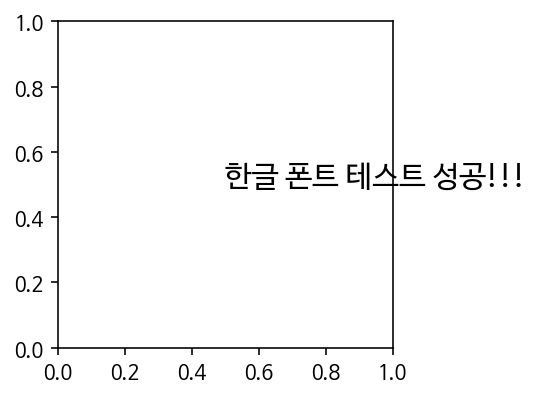

In [ ]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
cus_info = pd.read_csv("/content/drvie/MyDrive/NH2021/cus_info.csv")
stk_bnc = pd.read_csv("/content/drvie/MyDrive/NH2021/stk_bnc_hist.csv")
stk_hld_train = pd.read_csv("/content/drvie/MyDrive/NH2021/stk_hld_train.csv")
iem_info = pd.read_csv("/content/drvie/MyDrive/NH2021/iem_info_20210902.csv")

Mounted at /content/drvie


In [ ]:
data=[cus_info,stk_bnc,stk_hld_train,iem_info]
data.index

for i in data:
    print("Data Shaep" , i.shape)

Data Shaep (10000, 10)
Data Shaep (2573839, 6)
Data Shaep (681472, 4)
Data Shaep (3079, 5)


In [ ]:
cus_info.columns = ['act_id','성별','연령구간','투자성향','고객자산구간','주거래상품군','LIFESTYLE','고객등급','총투자기간','주거래업종구분']

In [ ]:
stk_bnc.columns=['act_id','기준일자','종목코드','잔고수량','잔고금액','액면가']
iem_info.columns=['종목코드','종목한글명','종목업종','시가총액규모유형','시장구분']

In [ ]:
cus_info.head(3) #(10000, 10) 

,act_id,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTYLE,고객등급,총투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9


In [ ]:
stk_bnc.head(3) #(2573839, 6) 

,act_id,기준일자,종목코드,잔고수량,잔고금액,액면가
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0


In [ ]:
stk_hld_train.head(3) #(681472, 4)

,act_id,iem_cd,byn_dt,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5


In [ ]:
iem_info.head(3) #(3079, 5)

,종목코드,종목한글명,종목업종,시가총액규모유형,시장구분
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99


# 2. EDA 

### 1) cus_info 

In [ ]:
cus_info.isnull().sum()

act_id               0
sex_dit_cd           0
cus_age_stn_cd       0
ivs_icn_cd           0
cus_aet_stn_cd       0
mrz_pdt_tp_sgm_cd    0
lsg_sgm_cd           0
tco_cus_grd_cd       0
tot_ivs_te_sgm_cd    0
mrz_btp_dit_cd       0
dtype: int64

In [ ]:
cus_info_cat=cus_info.drop(['act_id'],axis=1)
cus_info_cat.columns

Index(['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군', 'LIFESTYLE', '고객등급', '총투자기간',
       '주거래업종구분'],
      dtype='object')

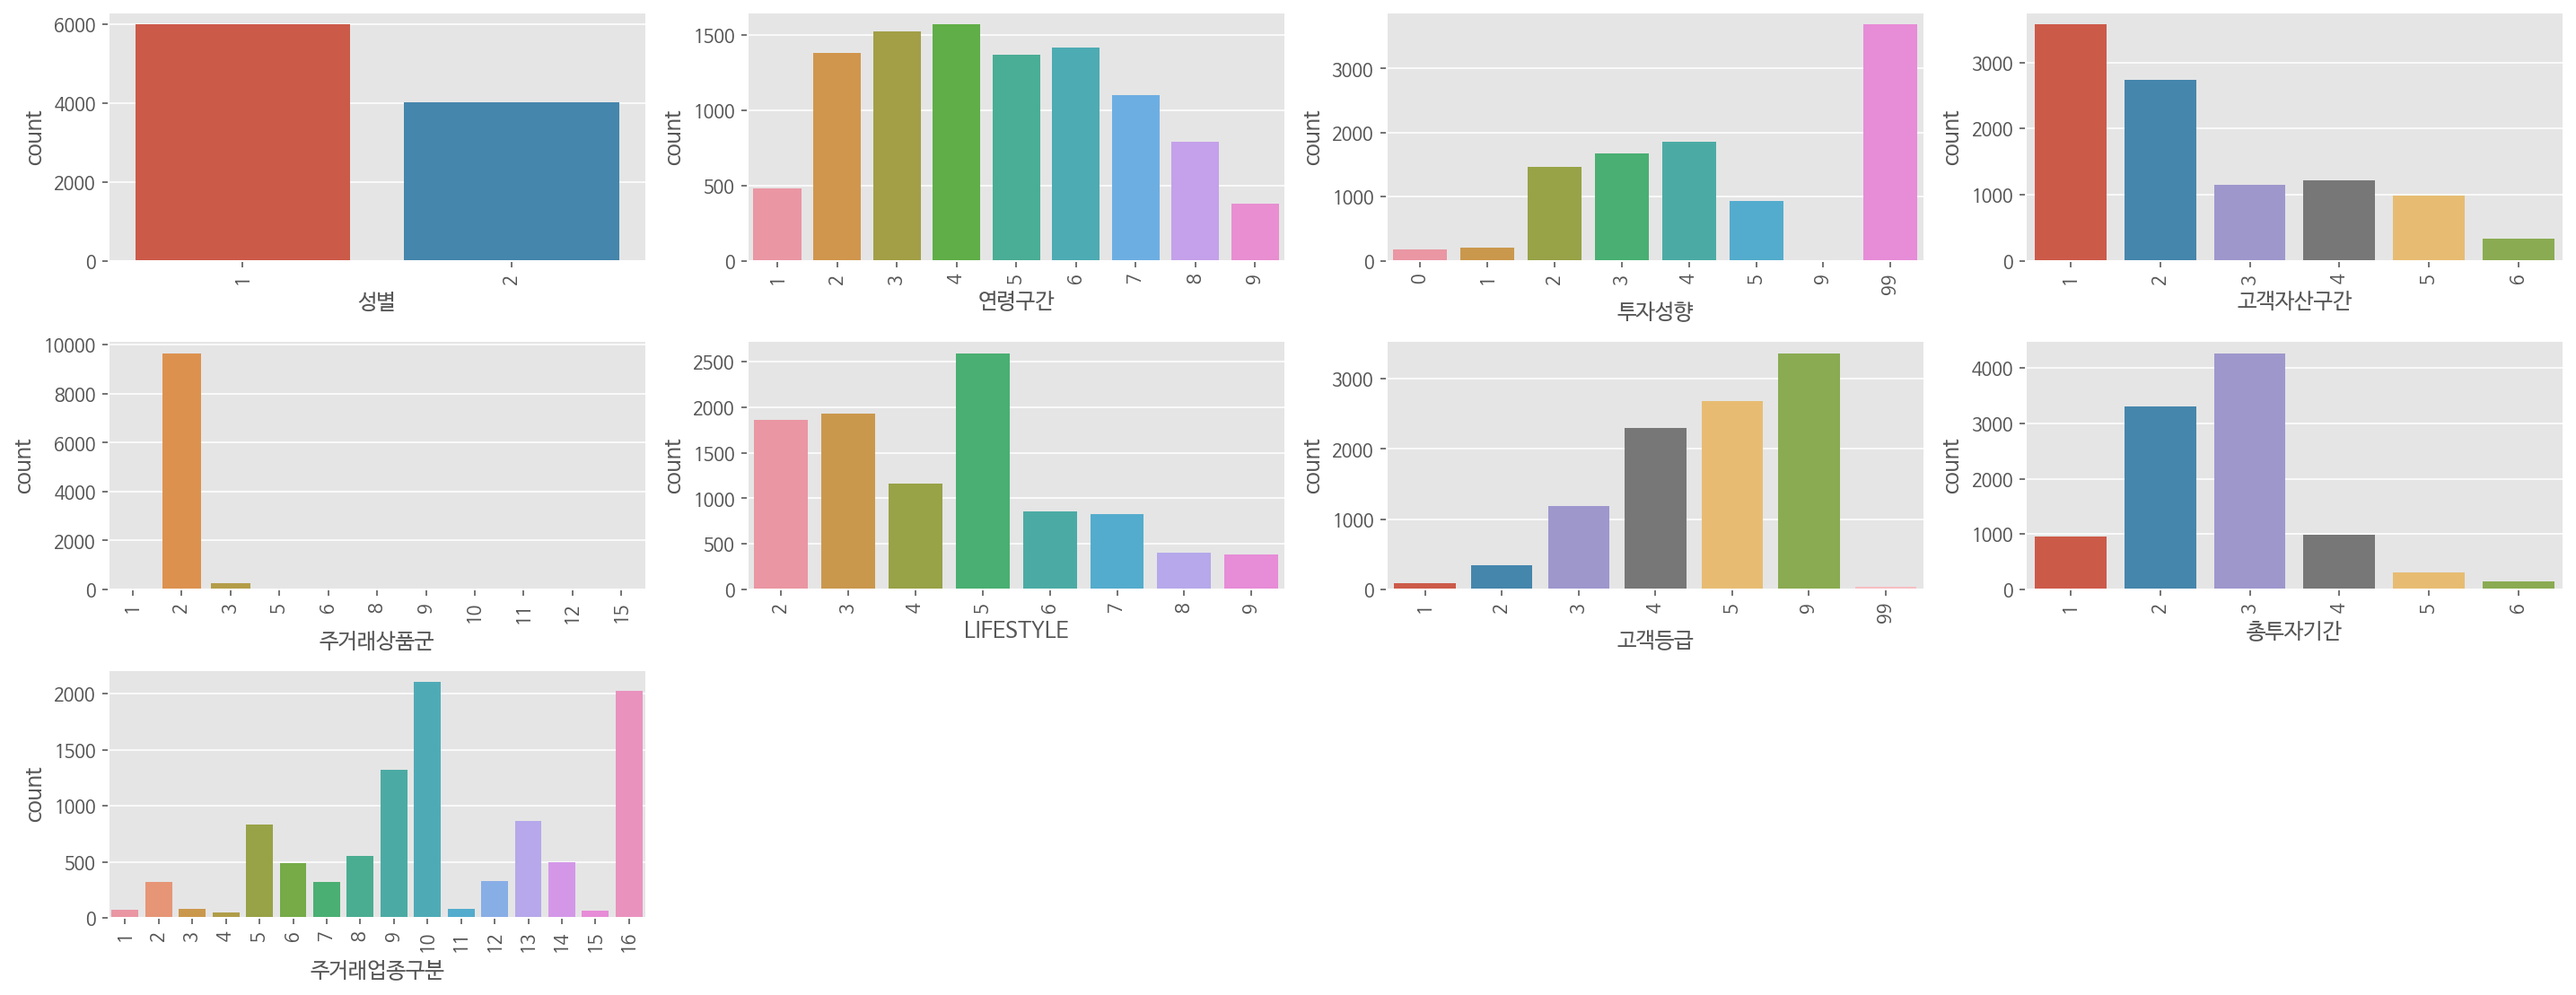

In [ ]:
fig = plt.figure(figsize=(20,20))
for index in range(len(cus_info_cat.columns)):
    plt.subplot(8,4,index+1)
    sns.countplot(x=cus_info_cat.iloc[:,index], data=cus_info_cat.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

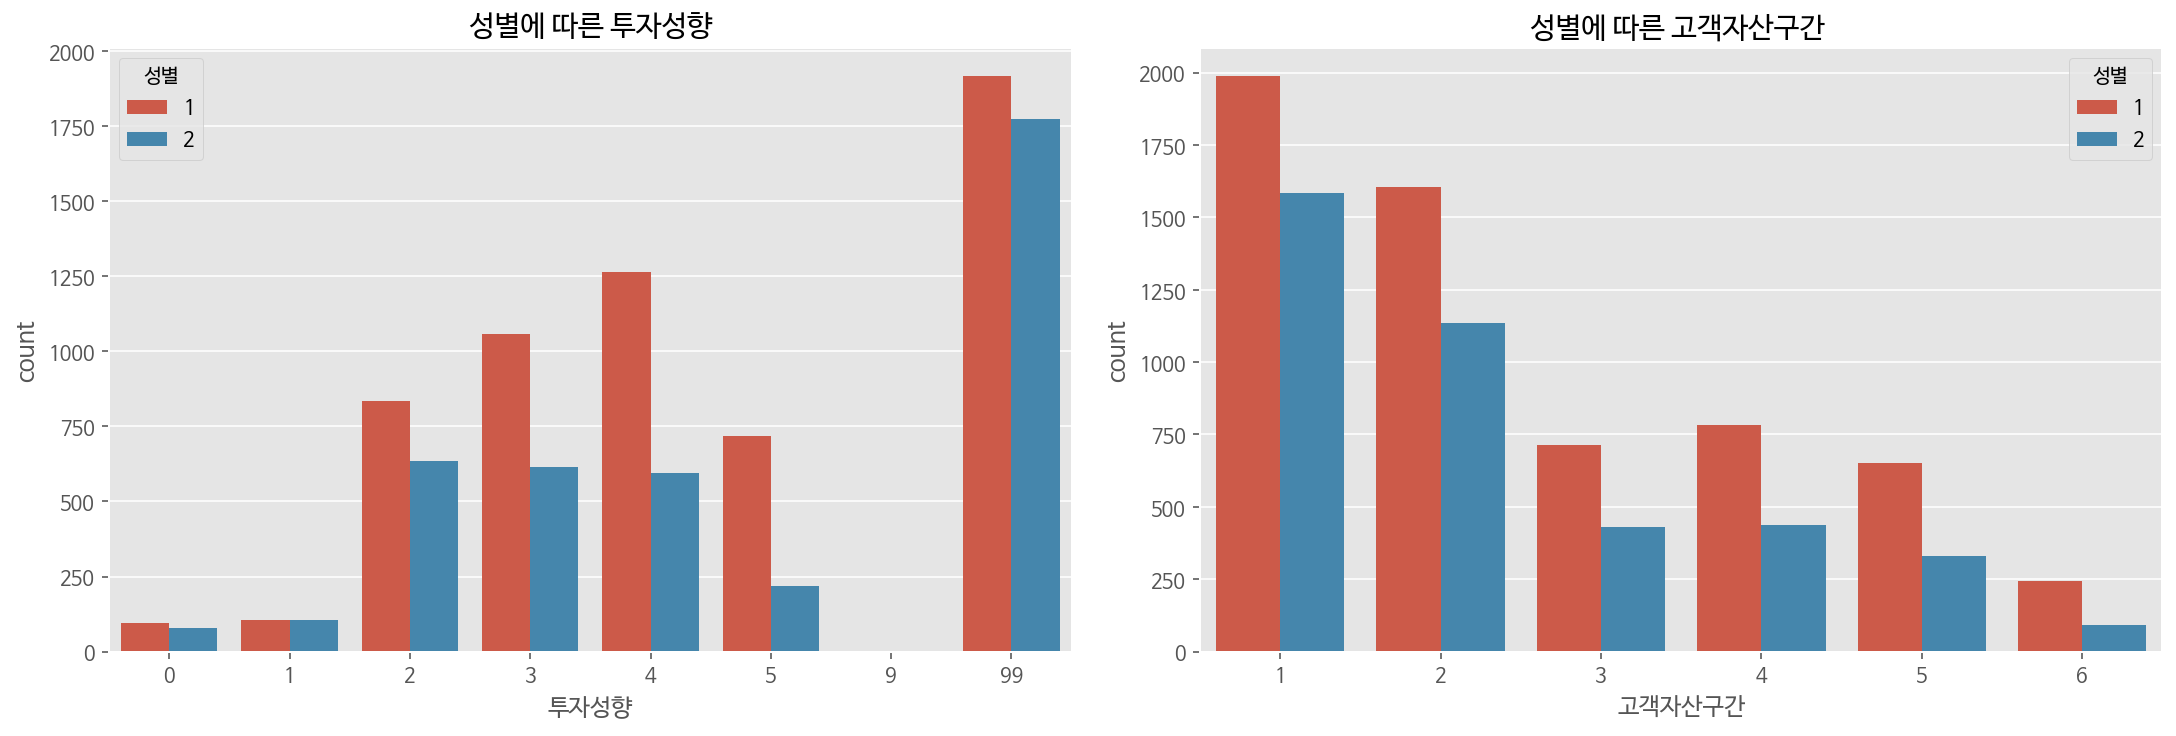

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(x='투자성향',hue='성별',data=cus_info,ax=axes[0])
sns.countplot(x='고객자산구간',hue='성별',data=cus_info,ax=axes[1])
axes[0].set_title("성별에 따른 투자성향")
axes[1].set_title("성별에 따른 고객자산구간 ")
plt.show()

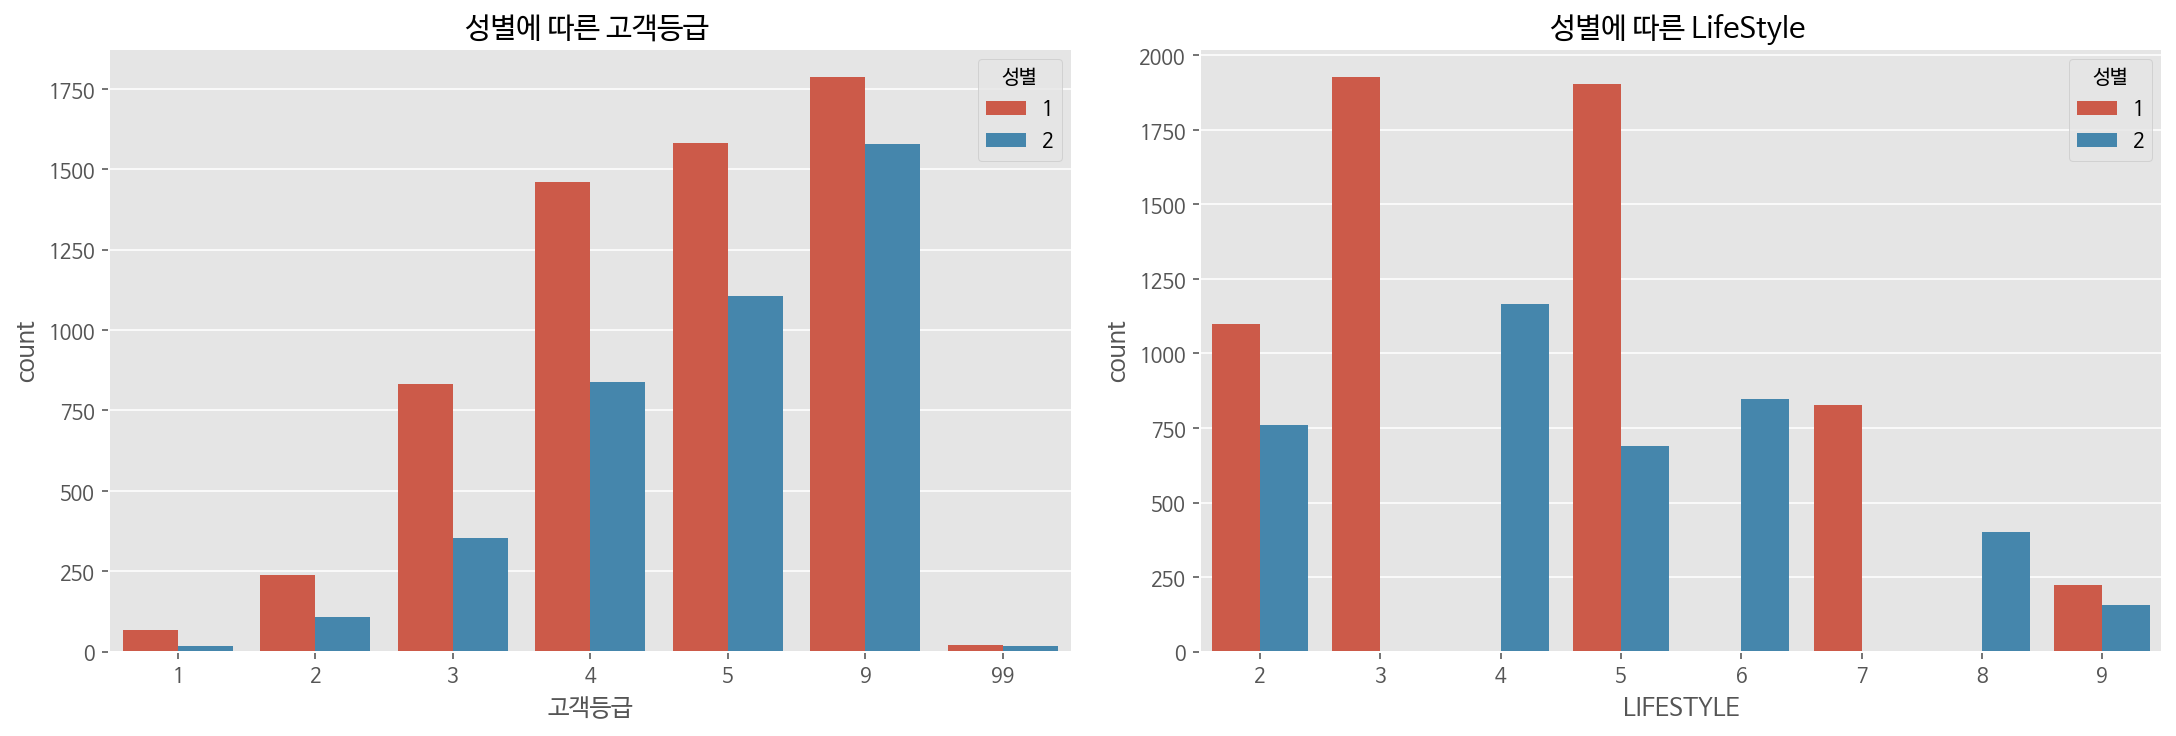

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(x='고객등급',hue='성별',data=cus_info,ax=axes[0])
sns.countplot(x='LIFESTYLE',hue='성별',data=cus_info,ax=axes[1])
axes[0].set_title("성별에 따른 고객등급 ")
axes[1].set_title("성별에 따른 LifeStyle ")
plt.show()

성별 경우 남성 > 여성

투자성향의경우 4,3,2,6

고객자산구간  99,4,3,2,5 (99 미응답 이므로 유추 또는 제거 고려) 



mrz_pdt_tp_sgm_cd 가 이상할 정도로 2 에몰려있음 -> 국내주식 

In [ ]:
cus_info['주거래업종구분'].value_counts()

10    2107
16    2024
9     1320
13     867
5      831
8      550
14     496
6      488
12     325
7      324
2      322
11      83
3       79
1       75
15      63
4       46
Name: 주거래업종구분, dtype: int64

### 2) stk_bnc

stk_bnc의 국내주식 잔고 이력이며 iem_info 랑 merge 해서 stk_bnc+iem_info = stk_bnc_iem 으로 통합

In [ ]:
stk_bnc_iem = pd.merge(stk_bnc,iem_info,how='left' ,on='종목코드')
stk_bnc_iem.head(5)

,act_id,기준일자,종목코드,잔고수량,잔고금액,액면가,종목한글명,종목업종,시가총액규모유형,시장구분
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0,호텔신라,7,1,1
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0,호텔신라,7,1,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0,NH투자증권,2,1,1
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0,삼성전자,9,1,1
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0,삼성전자,9,1,1


In [ ]:
stk_bnc_iem.isnull().sum()

act_id                  0
bse_dt                  0
iem_cd                  0
bnc_qty                 0
tot_aet_amt             0
stk_par_pr              0
iem_krl_nm              0
btp_cfc_cd              0
mkt_pr_tal_scl_tp_cd    0
stk_dit_cd              0
dtype: int64

In [ ]:
stk_bnc_iem.shape

(2573839, 10)

In [ ]:
stk_bnc_iem.groupby(['종목업종','종목한글명']).count()

,,act_id,기준일자,종목코드,잔고수량,잔고금액,액면가,시가총액규모유형,시장구분
종목업종,종목한글명,,,,,,,,
3S,99,375,375,375,375,375,375,375,375
AJ네트웍스,99,350,350,350,350,350,350,350,350
AK홀딩스,99,376,376,376,376,376,376,376,376
APS홀딩스,99,434,434,434,434,434,434,434,434
AP시스템,2,1494,1494,1494,1494,1494,1494,1494,1494
...,...,...,...,...,...,...,...,...,...
흥국화재2우B,99,96,96,96,96,96,96,96,96
흥국화재우,99,247,247,247,247,247,247,247,247
흥아해운,99,572,572,572,572,572,572,572,572


In [ ]:
sortvalue_1=stk_bnc_iem['종목한글명'].value_counts()[:10]

In [ ]:
stk_bnc_iem['종목업종'].value_counts()

10    621983
13    427451
5     288796
9     230380
14    157342
7     149559
6     135042
12    133124
8     122324
2     120542
11     63635
3      47463
1      43820
4      32378
Name: 종목업종, dtype: int64

In [ ]:
stk_bnc_iem.groupby(['종목업종','종목한글명']).count()

act_id  기준일자  종목코드  잔고수량  잔고금액   액면가  시가총액규모유형  시장구분
종목업종 종목한글명                                                          
1    DL           1913  1913  1913  1913  1913  1913      1913  1913
     DL건설          485   485   485   485   485   485       485   485
     DL우           152   152   152   152   152   152       152   152
     GS건설         2917  2917  2917  2917  2917  2917      2917  2917
     HDC아이콘트롤스     320   320   320   320   320   320       320   320
...                ...   ...   ...   ...   ...   ...       ...   ...
14   형지엘리트         602   602   602   602   602   602       602   602
     호그린에어           2     2     2     2     2     2         2     2
     호전실업           38    38    38    38    38    38        38    38
     화승엔터프라이즈      539   539   539   539   539   539       539   539
     화진            225   225   225   225   225   225       225   225

[2926 rows x 8 columns]

<function matplotlib.pyplot.show>

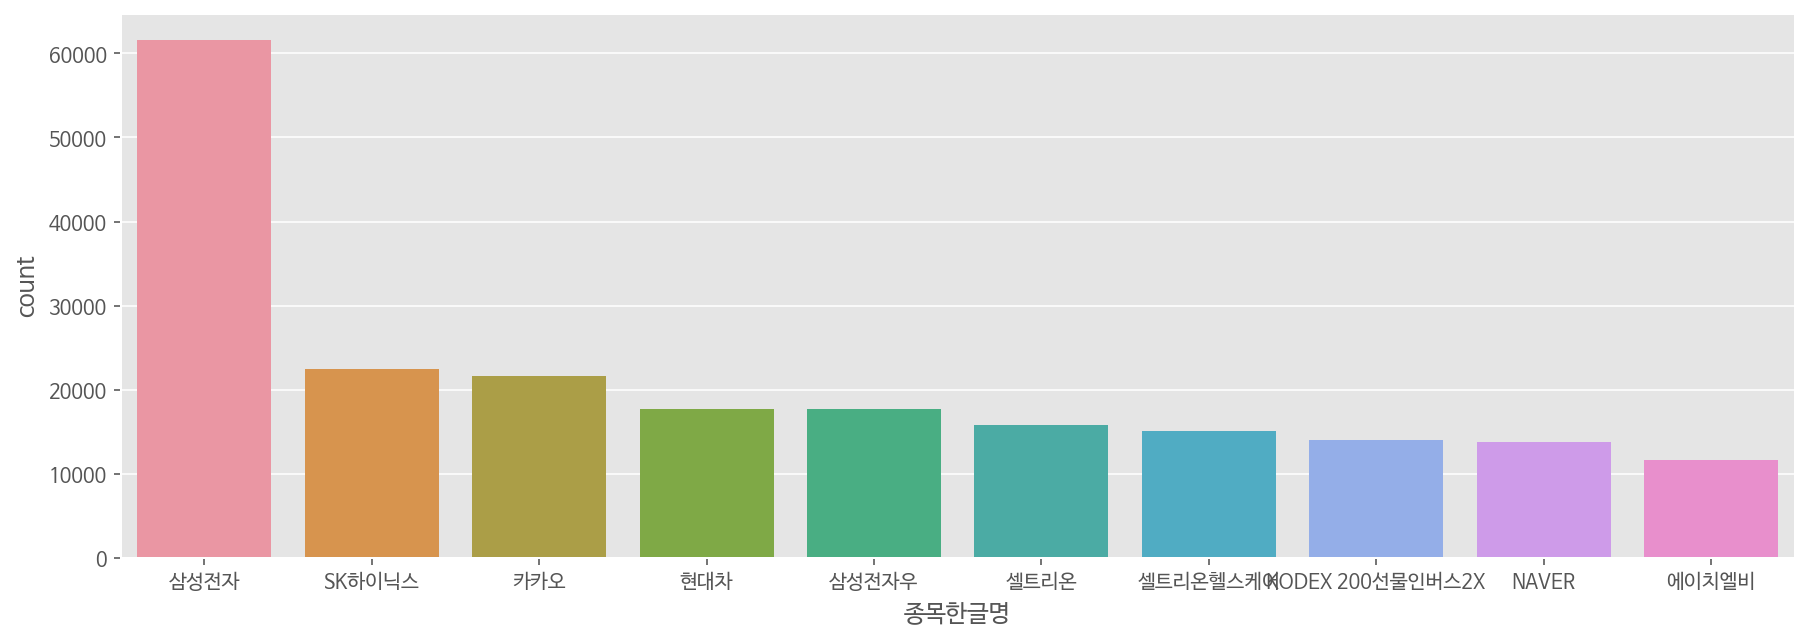

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='종목한글명',order=stk_bnc_iem['종목한글명'].value_counts().index[0:10],data=stk_bnc_iem)
plt.show 